In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, rfft, fftfreq, rfftfreq
from scipy.signal.windows import hann

In [130]:
# Time Scale
step_size   = 1e-10
amplitude   = 0.1
freq1       = 20e7
freq2       = 70e7
N_voltages  = 1000
time        = step_size*np.arange(N_voltages)

# Voltages
voltages    = np.zeros(shape=(N_voltages,4))

# Input Electrode
voltages[:,0] = amplitude*np.cos(freq1*time)
voltages[:,1] = amplitude*np.cos(freq2*time)

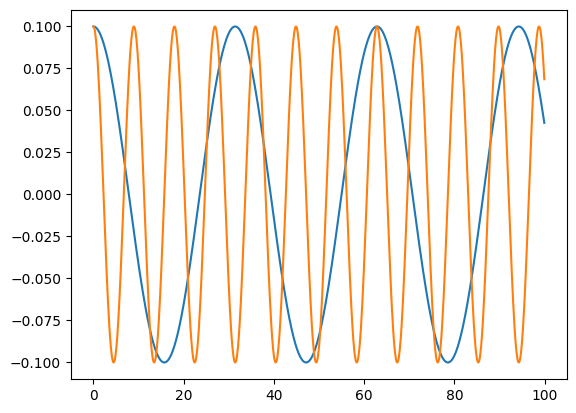

In [131]:
plt.plot(time*1e9, voltages[:,0])
plt.plot(time*1e9, voltages[:,1])
# plt.xlim(0,30)

In [132]:
bm      = hann(len(time))
signal  = voltages[:,1]*bm

In [133]:
def fft(signal, step_size):

    n_0         = int(len(signal)/2)
    signal_fft  = np.fft.fft(signal)
    freq        = np.fft.fftfreq(len(signal)) / step_size * 2 * np.pi

    return freq[:n_0], np.abs(signal_fft[:n_0])

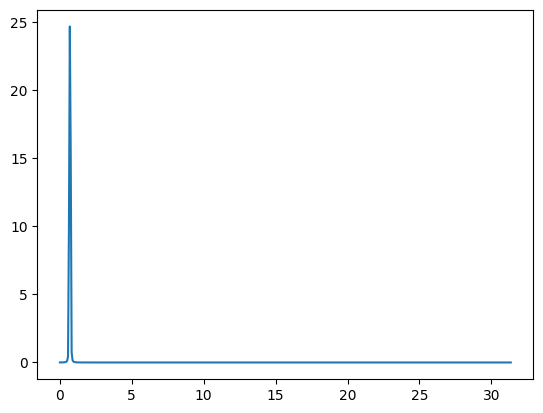

In [135]:
xf, yf = fft(signal,step_size)

plt.plot(xf/1e9,yf)

In [100]:
def return_fft(arr : np.array, step_size : float):

    arr_norm    = (arr-np.min(arr))/(np.max(arr)-np.min(arr))

    yf          = np.fft.rfft(arr_norm)
    xf          = np.fft.rfftfreq(len(arr_norm), step_size)

    return xf, np.abs(yf) #2.0*np.abs(yf[:len(arr_norm)//2])

(0.0, 500.0)

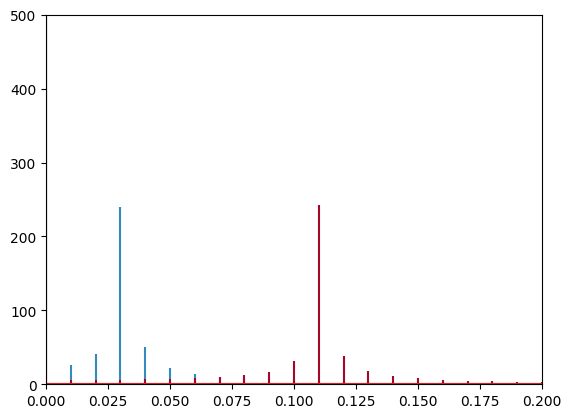

In [101]:
x1, y1 = return_fft(voltages[:,0], step_size)
x2, y2 = return_fft(voltages[:,1], step_size)

plt.stem(x1/10**9, y1, markerfmt=" ", linefmt='#348ABD')
plt.stem(x2/10**9, y2, markerfmt=" ", linefmt='#A60628')
plt.xlim(0,0.2)
plt.ylim(0,500)

In [85]:
# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

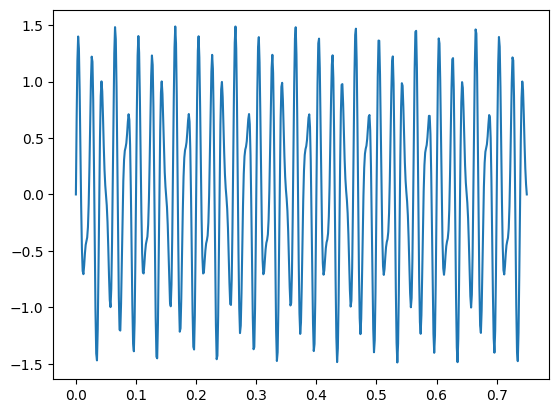

In [86]:
plt.plot(x,y)